In [68]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
df=pd.read_csv("Energy Dataset.csv")

In [19]:
df.sample(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
54,0.90,563.5,318.5,122.5,7.0,4,0.10,1,29.14,29.58
389,0.90,563.5,318.5,122.5,7.0,3,0.25,3,32.40,35.10
754,0.69,735.0,294.0,220.5,3.5,4,0.40,5,14.37,16.54
442,0.86,588.0,294.0,147.0,7.0,4,0.25,4,29.08,33.93
663,0.66,759.5,318.5,220.5,3.5,5,0.40,3,14.90,18.22


In [20]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [21]:
df.columns=["Relative Compactness"," Surface Area", "Wall Area"," Roof Area","Overall Height","Orientation"," Glazing Area","Glazing Area Distribution"," Heating Load","Cooling Load"]

In [22]:
df.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1    Surface Area              768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3    Roof Area                 768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6    Glazing Area              768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8    Heating Load              768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [24]:
df.shape

(768, 10)

In [25]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [26]:
df.isnull().sum()

Relative Compactness         0
 Surface Area                0
Wall Area                    0
 Roof Area                   0
Overall Height               0
Orientation                  0
 Glazing Area                0
Glazing Area Distribution    0
 Heating Load                0
Cooling Load                 0
dtype: int64

<Axes: >

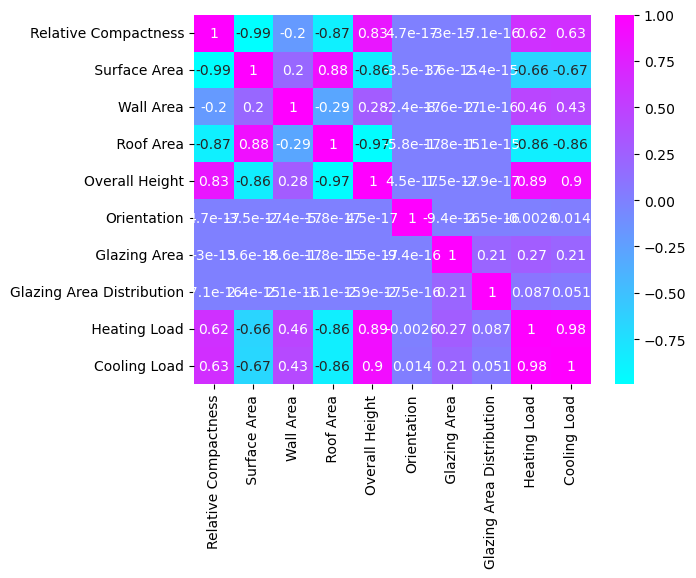

In [43]:
correlation_matrix = df.corr()
# Display the correlation matrix
sns.heatmap(correlation_matrix,annot=True,cmap="cool")

In [44]:
X=df.drop([" Heating Load","Cooling Load"],axis=1)

In [48]:
type(X)

pandas.core.frame.DataFrame

In [29]:
y1=df[" Heating Load"]

In [30]:
X.columns

Index(['Relative Compactness', ' Surface Area', 'Wall Area', ' Roof Area',
       'Overall Height', 'Orientation', ' Glazing Area',
       'Glazing Area Distribution'],
      dtype='object')

In [34]:
y1

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name:  Heating Load, Length: 768, dtype: float64

In [35]:
y2=df["Cooling Load"]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y1,test_size=0.2,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit on the training data
scaler.fit(X_train)
# Transform both training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Optional: Convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


In [60]:
X_train_scaled_df.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.553671,-0.696222,-0.007372,-0.679048,1.016421,-1.364411,-1.010300,-1.160598
1,-1.155118,1.250664,0.558439,0.957063,-0.983844,0.441081,1.227790,-0.515705
2,0.933402,-0.974349,-0.573184,-0.679048,1.016421,0.441081,0.108745,-0.515705
3,1.313133,-1.252476,-0.007372,-1.224418,1.016421,0.441081,0.108745,-1.160598
4,-0.965252,0.972537,-0.007372,0.957063,-0.983844,1.343827,-1.010300,0.774082


In [61]:
# Initialize the LinearRegression model
model = LinearRegression()
# Fit the model with features (X_train_scaled_df) and target (y_train)
model.fit(X_train_scaled_df, y_train)
# Optionally, print the coefficients and intercept
print("Coefficients:", model.coef_)    #bunlarin hamsini emsal dusun
print("Intercept:", model.intercept_)

Coefficients: [-6.33295980e+00  3.27172254e+13 -1.60822672e+13 -3.33701012e+13
  7.28125000e+00 -4.49676514e-02  2.68766785e+00  3.16322327e-01]
Intercept: 22.174959098397707


In [97]:
X.columns

Index(['Relative Compactness', ' Surface Area', 'Wall Area', ' Roof Area',
       'Overall Height', 'Orientation', ' Glazing Area',
       'Glazing Area Distribution'],
      dtype='object')

In [64]:
y_pred = model.predict(X_test_scaled_df) 
# Display predictions
print("Predicted values:", y_pred[:5])

Predicted values: [18.62175646 13.94052184 31.59771106 35.89330526 15.15253519]


In [66]:
y_test[:5]

668    16.47
324    13.17
624    32.82
690    41.32
473    16.69
Name:  Heating Load, dtype: float64

In [70]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"Mean Squared Error:{mse}")
print(f"Mean Absolute Error:{mae}")
print(f"Root Mean Squared Error:{rmse}")

Mean Squared Error:9.141096648315195
Mean Absolute Error:2.167090958348973
Root Mean Squared Error:3.0234246556372453


In [71]:
model.score(X_test_scaled_df,y_test)      #r2(coefficient of determination)

0.9123000984849295

In [75]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


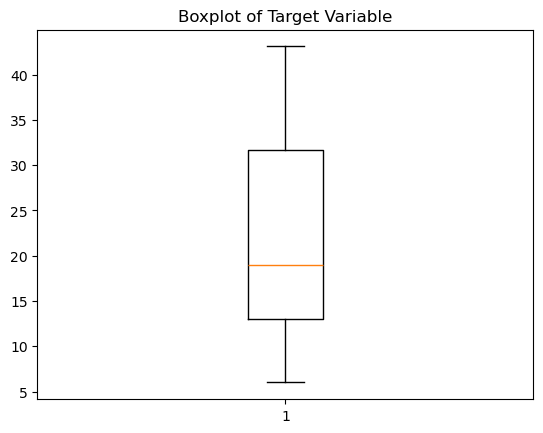

In [72]:
import matplotlib.pyplot as plt
plt.boxplot(y1)
plt.title("Boxplot of Target Variable")
plt.show()

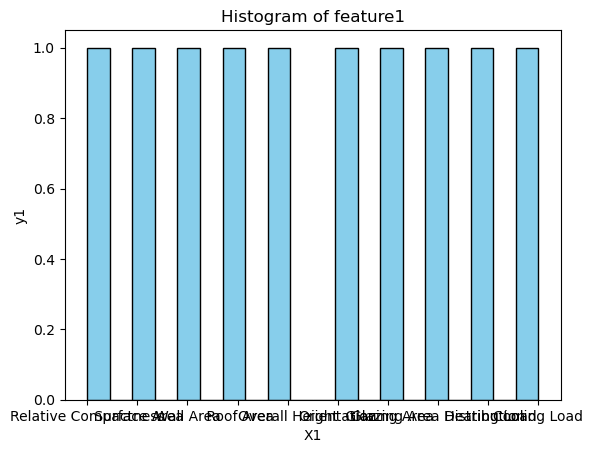

In [76]:
# Example column
column_data = df.columns

# Plot histogram
plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of feature1')
plt.xlabel('X')
plt.ylabel('y1')
plt.show()

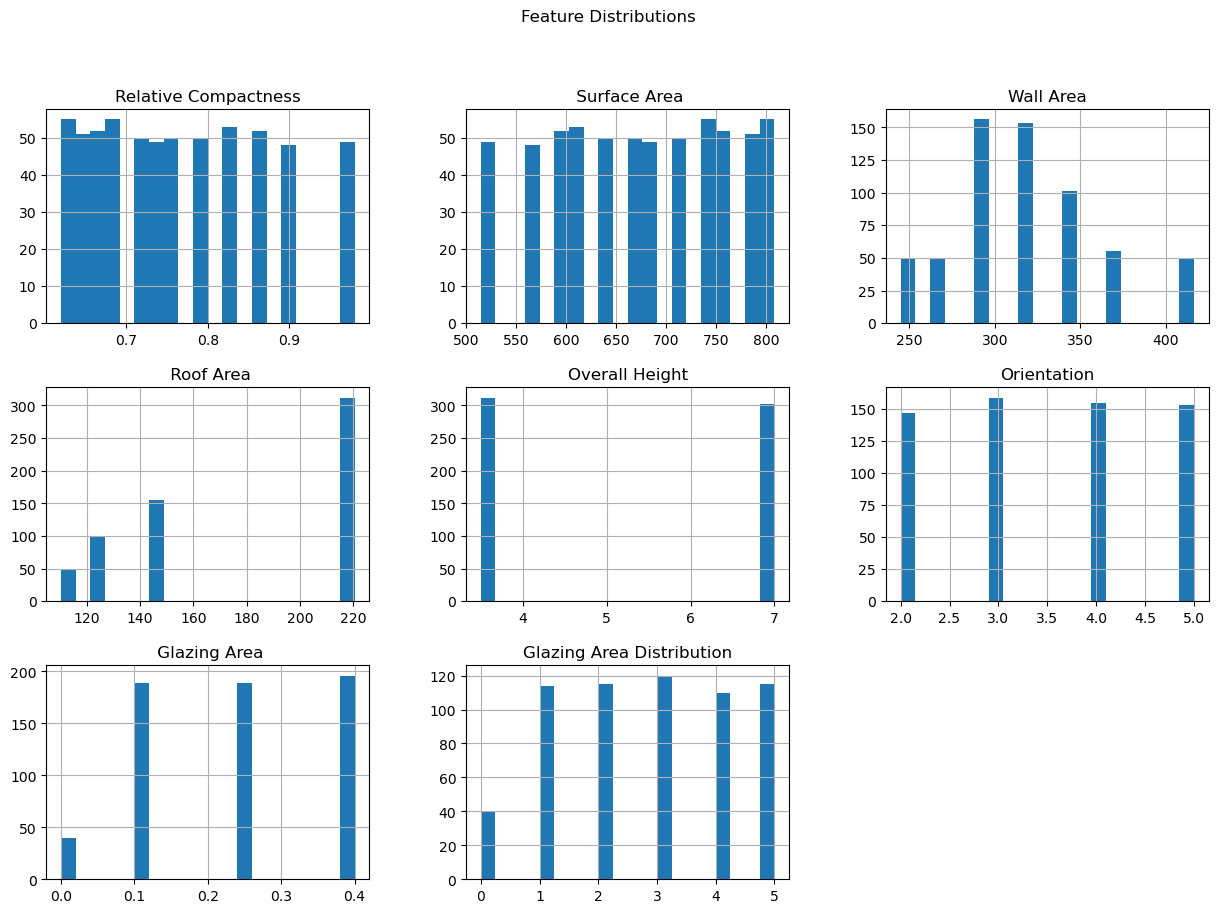

In [77]:
import matplotlib.pyplot as plt

# Plot histograms of numerical features
X_train.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


In [90]:
X_train,X_test,y2_train,y2_test=train_test_split(X,y2,test_size=0.2,random_state=42)

In [91]:

model2 = LinearRegression()
# Fit the model with features (X_train_scaled_df) and target (y_train)
model2.fit(X_train_scaled_df, y_train)
# Optionally, print the coefficients and intercept
print("Coefficients:", model2.coef_)    
print("Intercept:", model2.intercept_)

Coefficients: [-7.31026417e+00  3.14733525e+13 -1.54708372e+13 -3.21014067e+13
  7.15429688e+00  5.80749512e-02  1.97503662e+00  4.39491272e-02]
Intercept: 24.429934412893964


In [92]:
print(model.coef_)
print(model.intercept_)

[-6.33295980e+00  3.27172254e+13 -1.60822672e+13 -3.33701012e+13
  7.28125000e+00 -4.49676514e-02  2.68766785e+00  3.16322327e-01]
22.174959098397707


In [86]:
y_pred2=model2.predict(X_test_scaled_df)
y_pred2[:5]

array([19.52986952, 16.65365473, 32.29110308, 36.7116663 , 17.09970294])

In [94]:
y2_test[:5]

668    16.90
324    16.39
624    32.78
690    46.23
473    19.76
Name: Cooling Load, dtype: float64

In [95]:
model2.score(X_test_scaled_df,y2_test)

0.8932752930927723

In [96]:
mse=mean_squared_error(y2_test,y_pred2)
mae=mean_absolute_error(y2_test,y_pred2)
rmse=np.sqrt(mse)
print(f"Mean Squared Error:{mse}")
print(f"Mean Absolute Error:{mae}")
print(f"Root Mean Squared Error:{rmse}")

Mean Squared Error:9.88881644639415
Mean Absolute Error:2.1805536365462874
Root Mean Squared Error:3.1446488589974795


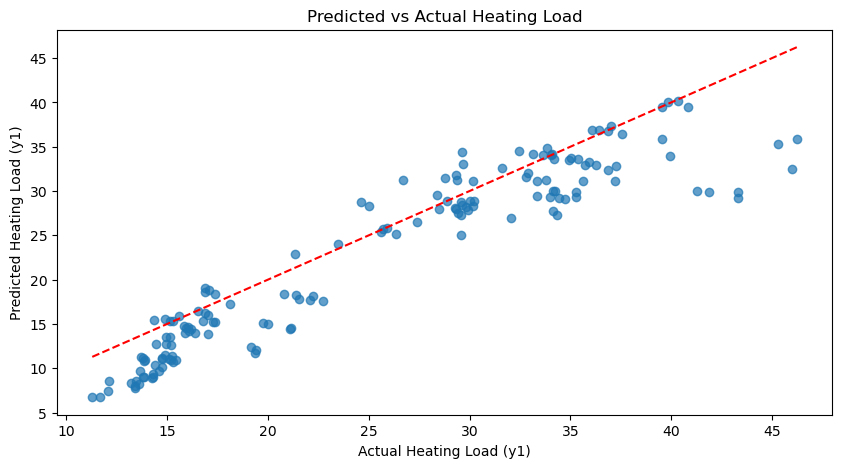

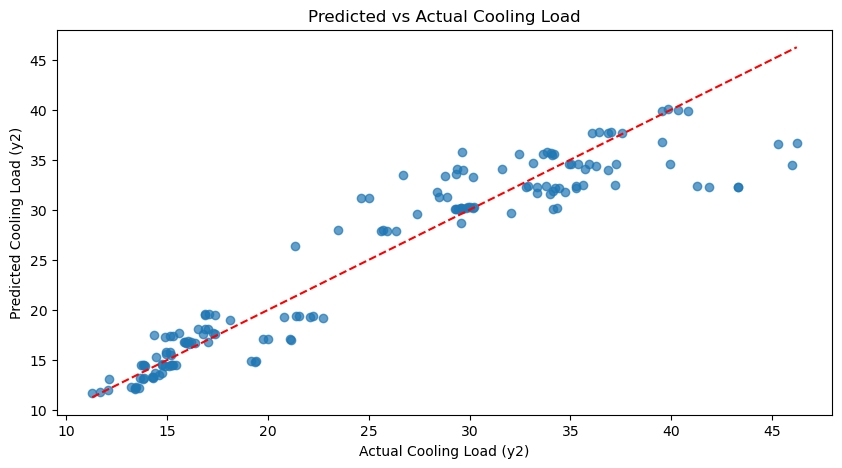

In [99]:
# Heating Load
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Heating Load (y1)')
plt.ylabel('Predicted Heating Load (y1)')
plt.title('Predicted vs Actual Heating Load')
plt.show()

# Cooling Load
plt.figure(figsize=(10, 5))
plt.scatter(y2_test, y_pred2, alpha=0.7)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')
plt.xlabel('Actual Cooling Load (y2)')
plt.ylabel('Predicted Cooling Load (y2)')
plt.title('Predicted vs Actual Cooling Load')
plt.show()
